# Orbit Classification using Specific Angular Momentum
by David Adeyemi    
David.F.Adeyemi@IBM.com

## Imports

In [1]:
import pandas as pd
import pandas_profiling as pp
import sklearn#Classification, Regression, Clustering, Dimensionality Reduction,Model Selection and Preprocesing (https://scikit-learn.org/)
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import concurrent.futures
from threading import Thread
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
pd.options.display.max_columns = 32

In [3]:
orbits = pd.read_csv('data/orbits10k.csv')
orbits.head()

,Update Time,Country,Norad ID,Ballistic Coefficient,Birth Date,Satellite Name,Mean Anomaly,Eccentricity,Argument of Perigee,Semi-Major-Axis,Epoch,Right Ascension of Ascending Node,Orbit Type,Inclination,X,Y,Z,Rx,Ry,Rz
0,2018-09-21T12:57:34Z,US,5,-0.000836,3/17/58,VANGUARD 1,-0.074076,0.185306,0.106879,8625577.201,2018-09-19T10:50:02.108000000Z,0.528073,LEO,0.598919,6083608.397,3530432.088,-10806.671030,-3511.202159,5785.242807,4618.390643
1,2018-09-21T12:57:34Z,US,11,0.001178,2/17/59,VANGUARD 2,1.515870,0.146055,-1.807318,8129711.528,2018-09-19T12:46:57.970000000Z,-1.286941,LEO,0.572340,2300413.919,-7909311.701,-4324.933114,5799.853120,637.966012,3702.275886
2,2018-09-21T12:57:34Z,US,12,-0.000028,2/17/59,VANGUARD R/B,0.402951,0.167067,-0.565692,8324420.021,2018-09-19T12:13:36.343000000Z,1.032665,LEO,0.576123,3642729.979,6083714.636,-6362.752338,-5438.427674,3991.550775,4362.728035
3,2018-09-21T12:57:34Z,US,16,0.003164,3/17/58,VANGUARD R/B,-0.870622,0.203509,1.237075,8821902.476,2018-09-19T05:17:19.725000000Z,-2.890836,LEO,0.597709,-7670825.090,-1985609.587,13681.825650,2801.324306,-5531.387171,4121.100752
4,2018-09-21T12:57:34Z,US,20,-0.000197,9/18/59,VANGUARD 3,-1.932535,0.166701,2.217743,8269209.620,2018-09-19T08:47:27.705000000Z,-1.199064,LEO,0.580515,3238395.545,-8331843.751,-6010.958041,4597.432129,2788.343902,3473.828704


## Feature Selection

In [4]:
features = pd.DataFrame

In [5]:
features = orbits[['Orbit Type','X','Y','Z','Rx','Ry','Rz']]

In [6]:
features.head()

,Orbit Type,X,Y,Z,Rx,Ry,Rz
0,LEO,6083608.397,3530432.088,-10806.671030,-3511.202159,5785.242807,4618.390643
1,LEO,2300413.919,-7909311.701,-4324.933114,5799.853120,637.966012,3702.275886
2,LEO,3642729.979,6083714.636,-6362.752338,-5438.427674,3991.550775,4362.728035
3,LEO,-7670825.090,-1985609.587,13681.825650,2801.324306,-5531.387171,4121.100752
4,LEO,3238395.545,-8331843.751,-6010.958041,4597.432129,2788.343902,3473.828704


## Feature Engineering

In [7]:
def cross(x,y,z,rx,ry,rz):
  a = np.array([x,y,z])
  b = np.array([rx, ry, rz])
  cross = np.cross(a,b)
  return cross[0], cross[1], cross[2]

Using MultiThreading to calculate the cross product r x v in parallel

In [8]:
with concurrent.futures.ThreadPoolExecutor() as executor:
  features['l'] = list(executor.map(cross, features['X'], features['Y'], features['Z'], features['Rx'], features['Ry'], features['Rz']))

/Users/davida/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
l_expand = pd.DataFrame(features.l.tolist(), columns=['lx','ly','lz'])
features = pd.concat([features[:], l_expand[:]],axis=1)

In [10]:
features.head()

,Orbit Type,X,Y,Z,Rx,Ry,Rz,l,lx,ly,lz
0,LEO,6083608.397,3530432.088,-10806.671030,-3511.202159,5785.242807,4618.390643,"(16367433736.810076, -28058535689.728893, 4759...",1.636743e+10,-2.805854e+10,4.759121e+10
1,LEO,2300413.919,-7909311.701,-4324.933114,5799.853120,637.966012,3702.275886,"(-29279694825.13774, -8541850956.947482, 47340...",-2.927969e+10,-8.541851e+09,4.734043e+10
2,LEO,3642729.979,6083714.636,-6362.752338,-5438.427674,3991.550775,4362.728035,"(26566989648.442894, -15857636834.920473, 4762...",2.656699e+10,-1.585764e+10,4.762598e+10
3,LEO,-7670825.090,-1985609.587,13681.825650,2801.324306,-5531.387171,4121.100752,"(-8107217687.287841, 31650570277.60327, 479926...",-8.107218e+09,3.165057e+10,4.799264e+10
4,LEO,3238395.545,-8331843.751,-6010.958041,4597.432129,2788.343902,3473.828704,"(-28926637361.268032, -11277266370.750488, 473...",-2.892664e+10,-1.127727e+10,4.733485e+10


## Plotting


Text(0.5, 0, 'lz')

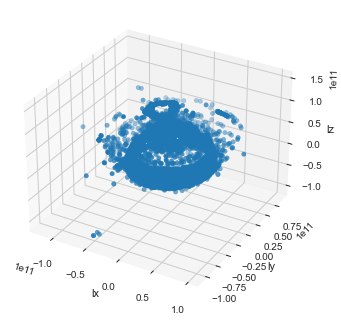

In [14]:
ovisplt = plt.figure().gca(projection='3d')
ovisplt.scatter(features['lx'], features['ly'], features['lz'])
ovisplt.set_xlabel('lx')
ovisplt.set_ylabel('ly')
ovisplt.set_zlabel('lz')


In [15]:
features.head()

,Orbit Type,X,Y,Z,Rx,Ry,Rz,l,lx,ly,lz
0,LEO,6083608.397,3530432.088,-10806.671030,-3511.202159,5785.242807,4618.390643,"(16367433736.810076, -28058535689.728893, 4759...",1.636743e+10,-2.805854e+10,4.759121e+10
1,LEO,2300413.919,-7909311.701,-4324.933114,5799.853120,637.966012,3702.275886,"(-29279694825.13774, -8541850956.947482, 47340...",-2.927969e+10,-8.541851e+09,4.734043e+10
2,LEO,3642729.979,6083714.636,-6362.752338,-5438.427674,3991.550775,4362.728035,"(26566989648.442894, -15857636834.920473, 4762...",2.656699e+10,-1.585764e+10,4.762598e+10
3,LEO,-7670825.090,-1985609.587,13681.825650,2801.324306,-5531.387171,4121.100752,"(-8107217687.287841, 31650570277.60327, 479926...",-8.107218e+09,3.165057e+10,4.799264e+10
4,LEO,3238395.545,-8331843.751,-6010.958041,4597.432129,2788.343902,3473.828704,"(-28926637361.268032, -11277266370.750488, 473...",-2.892664e+10,-1.127727e+10,4.733485e+10


## Profiling


In [ ]:
pp.ProfileReport(features)

In [18]:
y = features['Orbit Type']
X = features[['lx','ly','lz']]
display(X.head())
display(y.head())

,lx,ly,lz
0,1.636743e+10,-2.805854e+10,4.759121e+10
1,-2.927969e+10,-8.541851e+09,4.734043e+10
2,2.656699e+10,-1.585764e+10,4.762598e+10
3,-8.107218e+09,3.165057e+10,4.799264e+10
4,-2.892664e+10,-1.127727e+10,4.733485e+10


0    LEO
1    LEO
2    LEO
3    LEO
4    LEO
Name: Orbit Type, dtype: object

## Feature Scaling

In [19]:
scaler = MinMaxScaler()
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
display(X.head())

,lx,ly,lz
0,0.621744,0.401918,0.605879
1,0.412273,0.501048,0.604881
2,0.668549,0.463889,0.606017
3,0.509432,0.705193,0.607476
4,0.413893,0.487154,0.604858


## Creating Training and Test Partitions

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
print("train and test data shape=")
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

train and test data shape=
(7978, 3)
(1995, 3)
(7978,)
(1995,)


In [24]:
def calculate_metrics(y_true,y_pred):
    print("precision, recall, and f1 score:", precision_recall_fscore_support(y_true, y_pred,average='macro'))
    print("accuracy score:", accuracy_score(y_true, y_pred))
    #print(confusion_matrix(y_true, y_pred,labels=[0,1]))

## Create and Train Models

In [25]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0, solver='lbfgs').fit(x_train, y_train)
y_pred= clf1.predict(x_test)
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.47735608567156096, 0.5, 0.4883917840303245, None)
accuracy score: 0.9438596491228071


/Users/davida/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.linear_model import SGDClassifier
clf2 = SGDClassifier(max_iter=1000, tol=1e-3,class_weight="balanced").fit(x_train, y_train)
y_pred= clf2.predict(x_test)
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.4840261542507827, 0.6215178854067743, 0.41039433134441483, None)
accuracy score: 0.8952380952380953


/Users/davida/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn import svm
clf3 = svm.SVC(gamma='scale',class_weight="balanced").fit(x_train, y_train)
y_pred= clf3.predict(x_test)
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.8213270277411089, 0.9855021382799161, 0.880477778755764, None)
accuracy score: 0.9834586466165414


In [28]:
from sklearn.neighbors import KNeighborsClassifier
clf4 = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
y_pred= clf4.predict(x_test)
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.7406954060489758, 0.7070602348380126, 0.7223160172800589, None)
accuracy score: 0.9894736842105263


/Users/davida/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.gaussian_process import GaussianProcessClassifier
clf5 = GaussianProcessClassifier(max_iter_predict = 300, random_state=0).fit(x_train, y_train)
y_pred= clf5.predict(x_test)
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.47506925207756234, 0.5, 0.48720779738574116, None)
accuracy score: 0.9438596491228071


/Users/davida/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.naive_bayes import MultinomialNB 
clf6 = MultinomialNB().fit(x_train, y_train) 
y_pred= clf6.predict(x_test) 
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.2131578947368421, 0.25, 0.23011363636363635, None)
accuracy score: 0.8526315789473684


/Users/davida/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn import tree 
clf7 = tree.DecisionTreeClassifier(class_weight="balanced").fit(x_train, y_train) 
y_pred= clf7.predict(x_test) 
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.9828120662533543, 0.9618554757443647, 0.9718296623835505, None)
accuracy score: 0.9889724310776943


In [37]:
from sklearn.ensemble import RandomForestClassifier 
clf8 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0,class_weight="balanced").fit(x_train, y_train) 
y_pred= clf8.predict(x_test) 
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.7368168802174335, 0.7067662900996234, 0.720613094077108, None)
accuracy score: 0.9884711779448622


/Users/davida/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
clf9 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
y_pred= clf9.predict(x_test) 
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.7326797467092142, 0.6483547039102595, 0.6799225931301403, None)
accuracy score: 0.9759398496240601


/Users/davida/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.ensemble import VotingClassifier
clf10 = VotingClassifier(estimators=[('rfc', clf8), ('kn', clf4)], voting='hard').fit(x_train, y_train)
y_pred= clf10.predict(x_test)
calculate_metrics(y_test,y_pred)

precision, recall, and f1 score: (0.7422820556934647, 0.6936936936936937, 0.7147354721797541, None)
accuracy score: 0.9869674185463659


/Users/davida/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Best Classifier Selection

Removed gaussian process classifier, the cross val time is too great while going sequentially.

In [40]:
classifiers = [clf1, clf2, clf3, clf4, clf6, clf7, clf10, clf8, clf9]

In [41]:
from sklearn.model_selection import cross_val_score
cv_acc_log = pd.DataFrame(columns=["Classifier", "CV_Accuracy"]) #create accuracy log dataframe
for clf in classifiers:
    name = clf.__class__.__name__ #Get and print classifier name
    print(name)
    acc = cross_val_score(clf, X, y, cv=10, scoring="accuracy").mean()
    print("Accuracy: {:.2%}".format(acc), end = "\n\n") 
    log_entry = pd.DataFrame([[name, acc*100]], columns=["Classifier", "CV_Accuracy"])
    cv_acc_log = cv_acc_log.append(log_entry)

/Users/davida/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/davida/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/davida/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/davida/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/davida/opt/anaconda3/lib/python3.7/site-p

LogisticRegression
Accuracy: 94.62%

SGDClassifier
Accuracy: 88.75%

SVC
Accuracy: 97.62%

KNeighborsClassifier
Accuracy: 98.78%

MultinomialNB
Accuracy: 85.39%

DecisionTreeClassifier
Accuracy: 98.43%

VotingClassifier
Accuracy: 98.81%

RandomForestClassifier
Accuracy: 98.82%

GradientBoostingClassifier
Accuracy: 97.41%



,Classifier,CV_Accuracy
0,RandomForestClassifier,98.817042
0,VotingClassifier,98.807073
0,KNeighborsClassifier,98.776932
0,DecisionTreeClassifier,98.425919
0,SVC,97.623512
0,GradientBoostingClassifier,97.413252
0,LogisticRegression,94.615470
0,SGDClassifier,88.749776
0,MultinomialNB,85.390560


<AxesSubplot:xlabel='CV_Accuracy', ylabel='Classifier'>

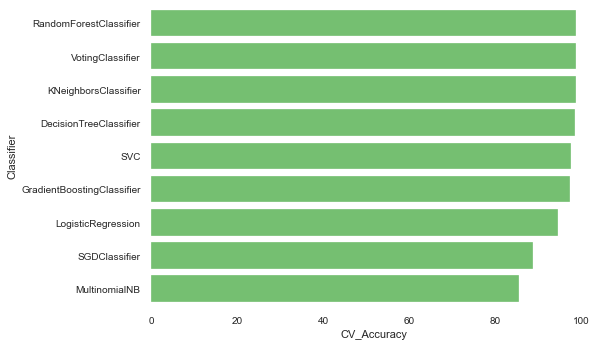

In [42]:
cv_acc_log = cv_acc_log.sort_values(['CV_Accuracy'], ascending = False)
display(cv_acc_log)
sns.set_color_codes("muted") 
sns.barplot(x='CV_Accuracy', y='Classifier', data=cv_acc_log, color="g")